# Segundo Previo
### RONALDO RAFAEL ARIAS PARADA-1151674

In [49]:
#Importacion de las librerias necesarias.
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [50]:
#Cargando el dataset.
iris = load_iris()

In [51]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [52]:
#Mostrando los datos en forma de dataframe
df_iris = pd.DataFrame(np.c_[iris['data'], iris['target']], columns = np.append(iris['feature_names'], ['target']))
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [53]:
df_iris.shape

(150, 5)

In [54]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [23]:
df_iris.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8

In [55]:
df_iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [56]:
#VERIFICAR SI HAY NULOS.
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [57]:
x = df_iris.iloc[:, :-1]
y= df_iris.iloc[:, 4:5]

In [59]:
#Entrenamiento y prueba de datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [60]:
#Correlación entre los datos
df_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

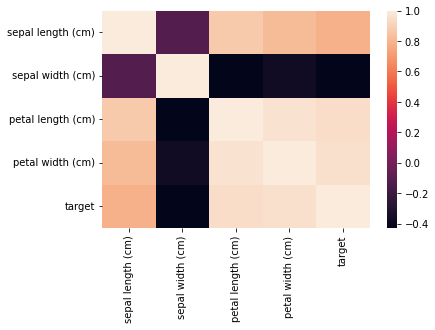

In [61]:
#Mapa de calor de la correlación de los datos
sns.heatmap(df_iris.corr())

In [62]:
#Escalado de los datos
escalar = StandardScaler()
x_train_scaled = escalar.fit_transform(x_train)
x_test_scaled = escalar.transform(x_test)

## Regresión logística

In [63]:
algoritmoRLog = LogisticRegression()
algoritmoRLog.fit(x_train_scaled, y_train.values.ravel())
pred_RL = algoritmoRLog.predict(x_test_scaled)

In [48]:
#Matriz de confusión del algoritmo de  Regresión logistica.
matrizRLog = confusion_matrix(y_test, pred_RL)

#MÉTRICAS DE LA MATRIZ DE CONFUSIÓN DEL MODELO DE REGRESIÓN LOGISTICA.
exactitudMRL = accuracy_score(y_test, pred_RL)
print("Exactitud ", exactitudMRL)

scoref1RLog = f1_score(y_test, pred_RL, average='weighted')
print("Puntaje F1 ", scoref1RLog)

clasificacionRLog = classification_report(y_test, pred_RL)
print("Clasificación")
print(clasificacionRLog)

Exactitud  0.9333333333333333
Puntaje F1  0.9347222222222221
Clasificación
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.78      1.00      0.88         7
         2.0       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



### Naive Bayes

In [64]:
algoritmoNB = GaussianNB()
algoritmoNB.fit(x_train_scaled, y_train.values.ravel())
pred_NB = algoritmoNB.predict(x_test_scaled)

In [47]:
#Matriz de confusión del algoritmo Naive bayes.
matrizNB = confusion_matrix(y_test, pred_NB)

#MÉTRICAS DE LA MATRIZ DE CONFUSIÓN DEL ALGORITMO NAIVE BAYES.
exactitudANB = accuracy_score(y_test, pred_NB)
print("Exactitud ",exactitudANB)

puntajef1NB = f1_score(y_test, pred_NB, average='weighted')
print("Puntaje F1 ",puntajef1NB)

clasificacionNB = classification_report(y_test, pred_NB)
print("Clasificación")
print(clasificacionNB)

Exactitud  0.9
Puntaje F1  0.9013333333333333
Clasificación
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.75      0.86      0.80         7
         2.0       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30



### Support Vector Machine

In [65]:
algoritmoSVC = SVC(kernel = 'linear')
algoritmoSVC.fit(x_train_scaled, y_train.values.ravel())
pred_svc = algoritmoSVC.predict(x_test_scaled)

In [67]:
#Matriz de confusión del algoritmo support vector machine.
matrizSVC = confusion_matrix(y_test, pred_svc)

#MÉTRICAS DE LA MATRIZ DE CONFUSIÓN DEL ALGORITMO SUPPORT VECTOR MACHINE.
exactitudASVC = accuracy_score(y_test, pred_svc)
print("Exactitud ",exactitudASVC)

puntajef1SVC = f1_score(y_test, pred_svc, average='weighted')
print("Puntaje F1 ",puntajef1SVC)

clasificacionSVC = classification_report(y_test, pred_svc)
print("Clasificación")
print(clasificacionSVC)

Exactitud  1.0
Puntaje F1  1.0
Clasificación
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         8
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Random Forest

In [68]:
algoritmoRFC = RandomForestClassifier(n_estimators = 300, max_depth = 8)
algoritmoRFC.fit(x_train_scaled, y_train.values.ravel())
pred_rfc = algoritmoRFC.predict(x_test_scaled)

In [69]:
#Matriz de confusión del algoritmo random forest para clasificación.
matrizRFC = confusion_matrix(y_test, pred_rfc)

#MÉTRICAS DE LA MATRIZ DE CONFUSIÓN DEL ALGORITMO RANDOM FOREST PARA CLASIFICACIÓN.
exactitudARFC = accuracy_score(y_test, pred_rfc)
print("Exactitud ",exactitudARFC)

puntajef1RFC = f1_score(y_test, pred_rfc, average='weighted')
print("Puntaje F1 ",puntajef1RFC)

clasificacionRFC = classification_report(y_test, pred_rfc)
print("Clasificación")
print(clasificacionRFC)

Exactitud  0.9666666666666667
Puntaje F1  0.96692242114237
Clasificación
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.89      1.00      0.94         8
         2.0       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### K-Nearest Neighbors

In [70]:
algoritmoKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
algoritmoKNN.fit(x_train_scaled, y_train.values.ravel())
pred_knn = algoritmoKNN.predict(x_test_scaled)

In [71]:
#Matriz de confusión del algoritmo k-nearest neighbors.
matrizKNN = confusion_matrix(y_test, pred_knn)

#MÉTRICAS DE LA MATRIZ DE CONFUSIÓN DEL ALGORITMO K-NEAREST NEIGHBORS PARA CLASIFICACIÓN.
exactitudAKNN = accuracy_score(y_test, pred_knn)
print("Exactitud ",exactitudAKNN)

puntajef1KNN = f1_score(y_test, pred_knn, average='weighted')
print("Puntaje F1 ",puntajef1KNN)

clasificacionKNN = classification_report(y_test, pred_knn)
print("Clasificación")
print(clasificacionKNN)

Exactitud  0.9666666666666667
Puntaje F1  0.96692242114237
Clasificación
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.89      1.00      0.94         8
         2.0       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Conclusión

EL mejor modelo de clasiicación es el realizado por el algoritmo de Support Vector Machine para los siguientes valores:

In [72]:
print("Exactitud ",exactitudASVC)
print("Puntaje F1 ",puntajef1SVC)

Exactitud  1.0
Puntaje F1  1.0
